In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils_2 import plot_policy, plot_action_values, test_agent

Observation space shape: [5 5]
Number of actions: 4


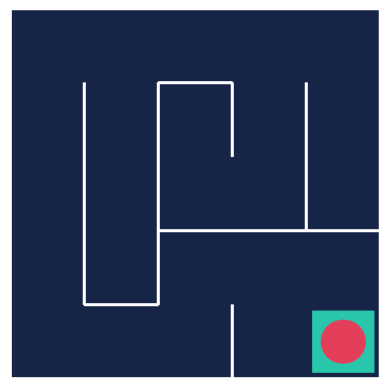

In [25]:
env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

In [26]:
action_values = np.full((5,5,4), -100)
action_values[4,4,:] = 0.

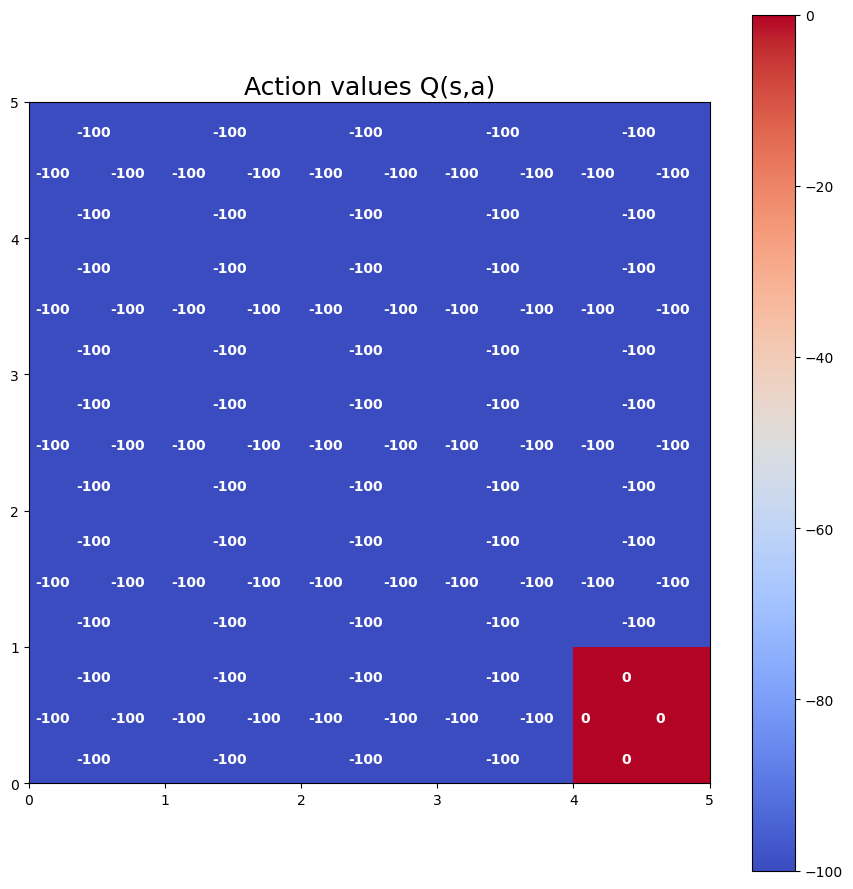

In [27]:
plot_action_values(action_values)

In [28]:
#target policy for each state, av is the vector of all four actions here
#choice will pick one randomly
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [29]:
action = target_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


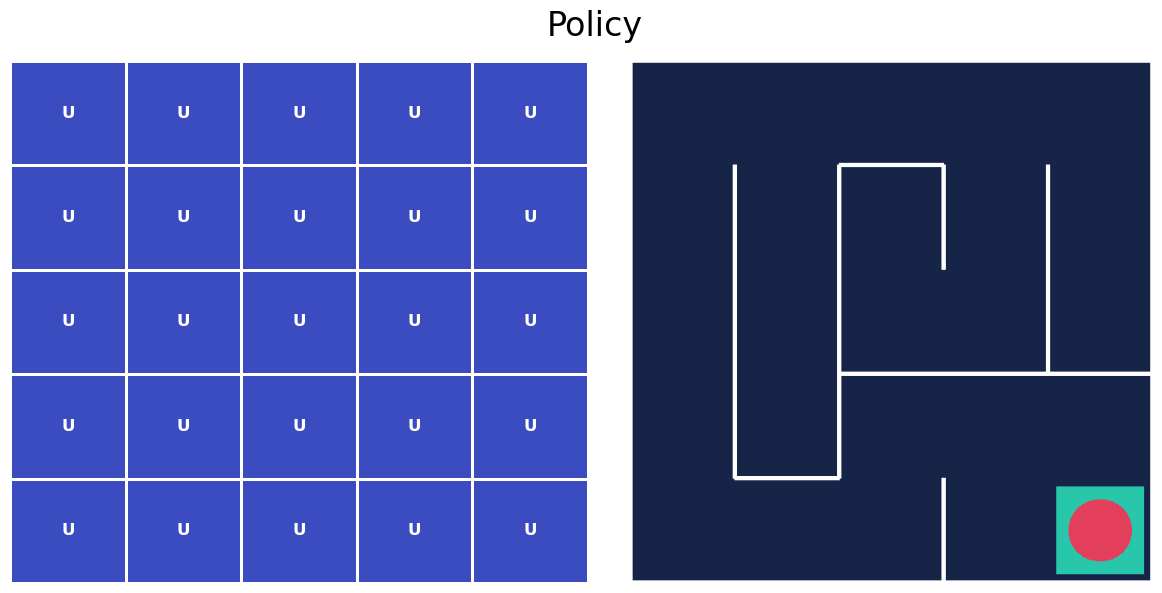

In [30]:
plot_policy(action_values, frame)

In [31]:
def exploratory_policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

In [32]:
action = exploratory_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 2


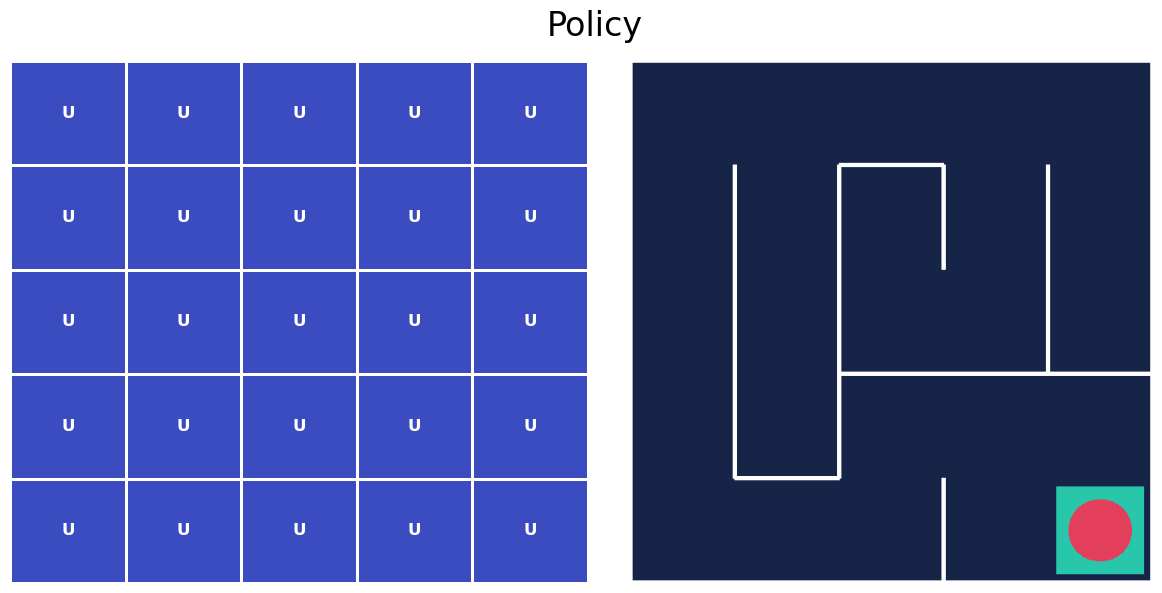

In [33]:
plot_policy(action_values, frame)

In [34]:
#action_values-: optimised values of which action to be taken
#target and ex policy and episodes
#gamma discount factor, epsilon random action probabilty to be chosen
#csa-: table to store running sum of W important sampling ratios for all states and actions
#return G  =to be intizalized as 0.
#W is imortant sampling to be intizalized as 1.
#state initial state, done is goal reached or not
#transition is the trajectory stored
#explortory policy to be used to generate the action.
#state visits in reversed will compute the return
#update the table with important sampling ration for the moment in time
#will store the old q value in qsa
#we will update the action value by the formula to update the q value
#if exploratary policy action is not equal to target policy action then break the episode
#we are updating the important sampling if the action value is equal to target value.
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):
    csa = np.zeros((5, 5, 4))

    for episode in range(1, episodes + 1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
#             env.render()
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W / csa[state_t][action_t]) * (G - qsa)

            if action_t != target_policy(state_t):
                break

            W = W * 1. / (1 - epsilon + epsilon/4)

In [35]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=1000, epsilon=0.3)

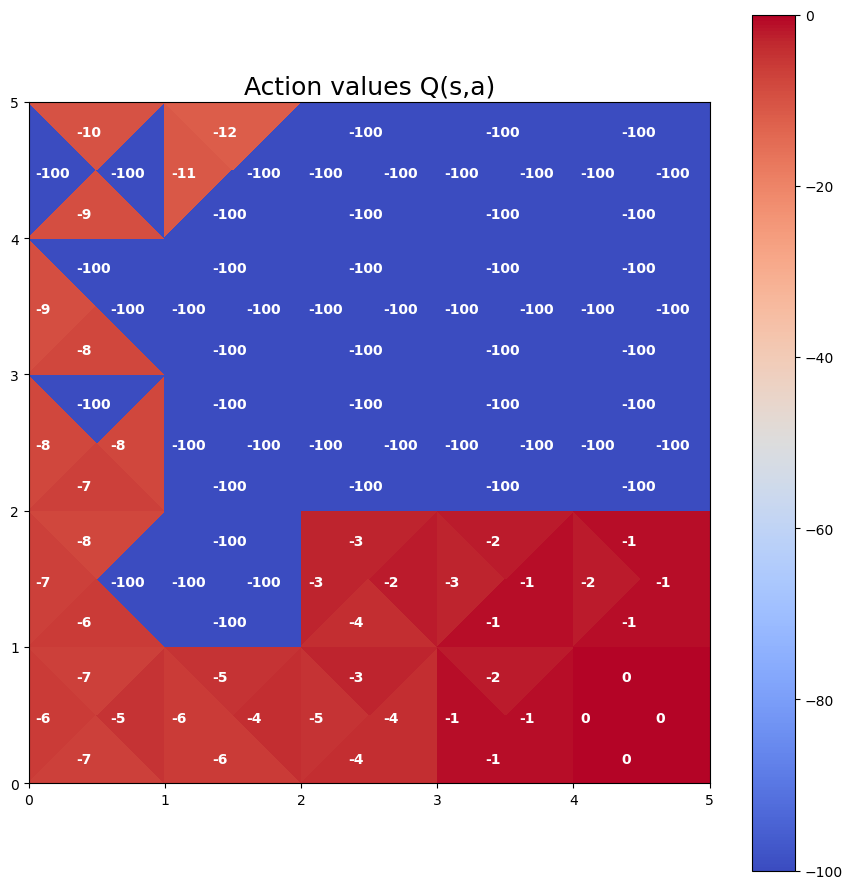

In [36]:
plot_action_values(action_values)

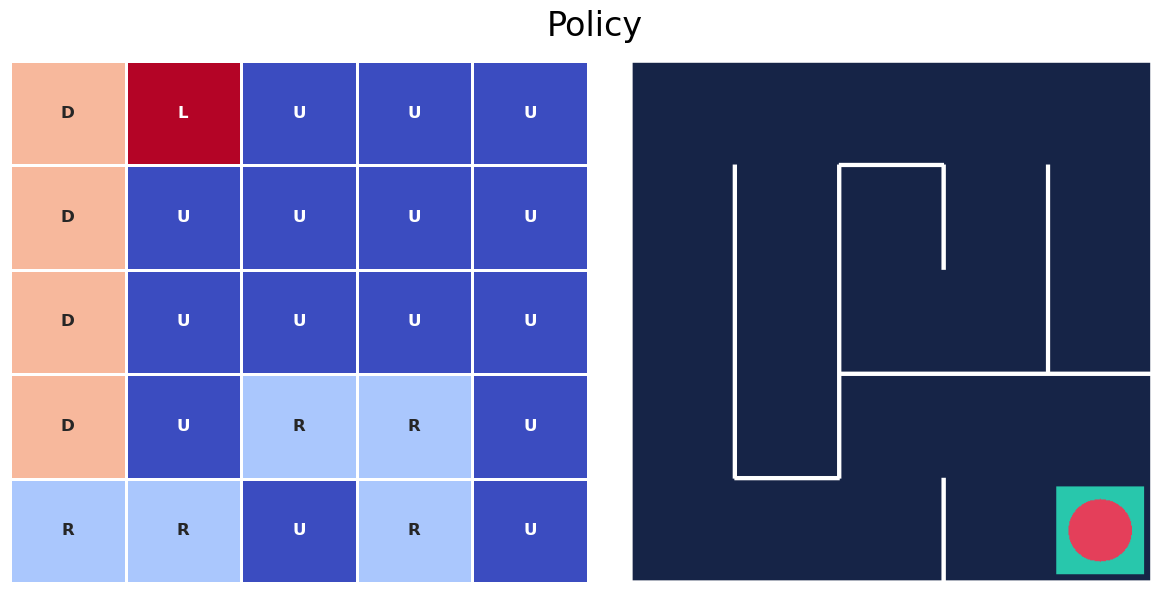

In [37]:
plot_policy(action_values, frame)

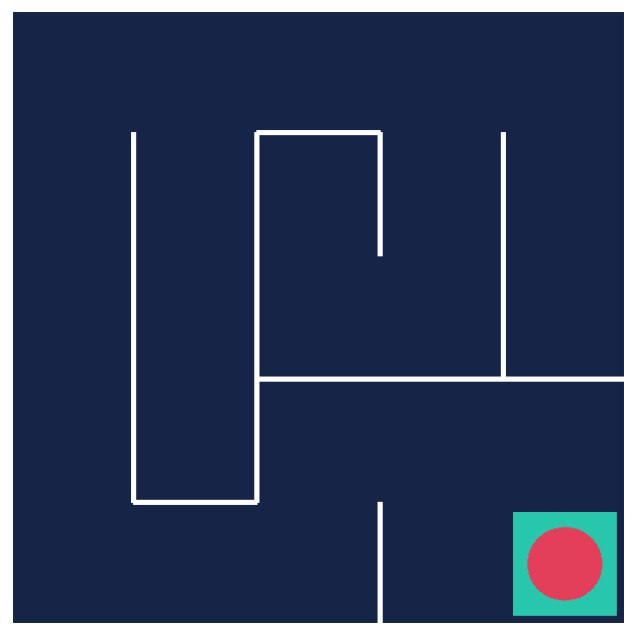

In [38]:
test_agent(env, target_policy)